In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
driving_data = pd.read_csv(r'E:\Envirocar\analysis\Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv',
                           usecols=['Absolute_throttle_position','Engine_speed','Calculated_LOAD_value','Vehicle_speed','Time(s)',
                                    'Class'])

In [4]:
driving_data.head()

,Absolute_throttle_position,Engine_speed,Calculated_LOAD_value,Vehicle_speed,Time(s),Class
0,13.3,929,23.9,0,1,A
1,13.7,726,30.6,0,2,A
2,13.7,685,31.8,0,3,A
3,13.3,675,29.0,0,4,A
4,13.7,716,30.2,0,5,A


In [5]:
driving_data.describe()

,Absolute_throttle_position,Engine_speed,Calculated_LOAD_value,Vehicle_speed,Time(s)
count,94380.000000,94380.000000,94380.00000,94380.000000,94380.000000
mean,19.362277,1422.838885,42.30515,28.518881,1110.031765
std,12.079046,613.428059,18.38917,25.309664,683.042550
min,12.500000,0.000000,0.00000,0.000000,1.000000
25%,14.500000,823.000000,27.10000,4.000000,537.000000
50%,15.300000,1473.000000,41.60000,23.000000,1073.000000
75%,19.200000,1878.000000,51.00000,51.000000,1616.000000
max,84.300000,6253.000000,98.40000,129.000000,2948.000000


In [6]:
driving_data['Class'].describe()

count     94380
unique       10
top           D
freq      13244
Name: Class, dtype: object

In [7]:
driving_data['Vehicle_speed'].describe()

count    94380.000000
mean        28.518881
std         25.309664
min          0.000000
25%          4.000000
50%         23.000000
75%         51.000000
max        129.000000
Name: Vehicle_speed, dtype: float64

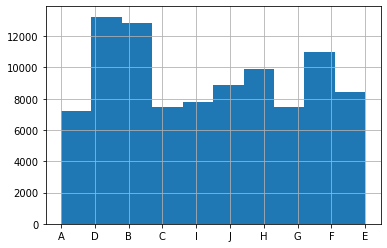

In [8]:
driving_data['Class'].hist()

In [9]:
# Section the data according to drivers
driver_A = driving_data[driving_data['Class']=='A']
driver_B = driving_data[driving_data['Class']=='B']
driver_C = driving_data[driving_data['Class']=='C']
driver_D = driving_data[driving_data['Class']=='D']
driver_E = driving_data[driving_data['Class']=='E']
driver_F = driving_data[driving_data['Class']=='F']
driver_G = driving_data[driving_data['Class']=='G']
driver_H = driving_data[driving_data['Class']=='H']
driver_I = driving_data[driving_data['Class']=='I']
driver_J = driving_data[driving_data['Class']=='J']

In [10]:
#driver_A.describe()
driver_A.tail()

,Absolute_throttle_position,Engine_speed,Calculated_LOAD_value,Vehicle_speed,Time(s),Class
88859,14.1,660,43.5,0,2012,A
88860,14.1,662,43.9,0,2013,A
88861,14.1,666,43.9,0,2014,A
88862,13.7,672,43.9,0,2015,A
88863,12.9,212,0.0,0,2016,A


In [11]:
#driver_A.info()
#Check for any missing values
driver_A.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A46AF1B7B8>,
      dtype=object)

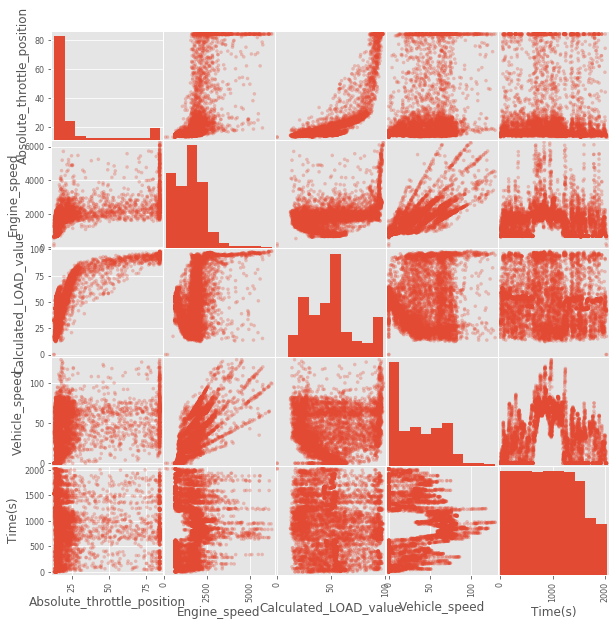

In [12]:
plt.style.use('ggplot')
pd.plotting.scatter_matrix(driver_A, alpha=0.3, figsize = [10,10], s=50)

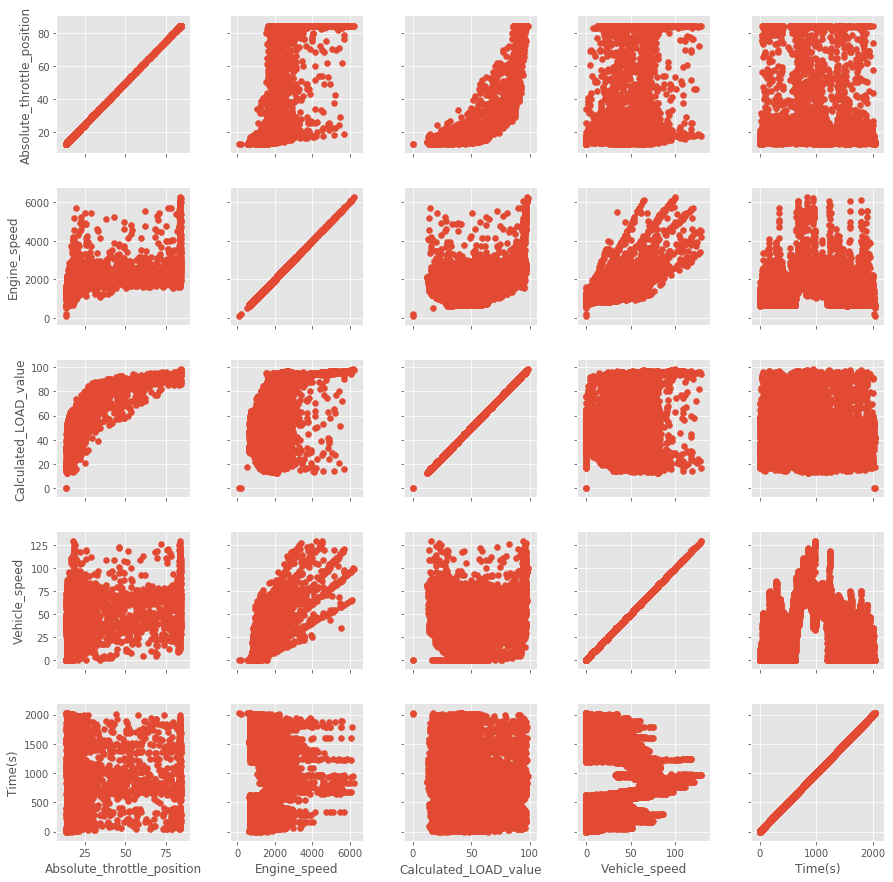

In [13]:
# Seaborn scatter matrix
g = sns.PairGrid(driver_A)
g = g.map(plt.scatter)

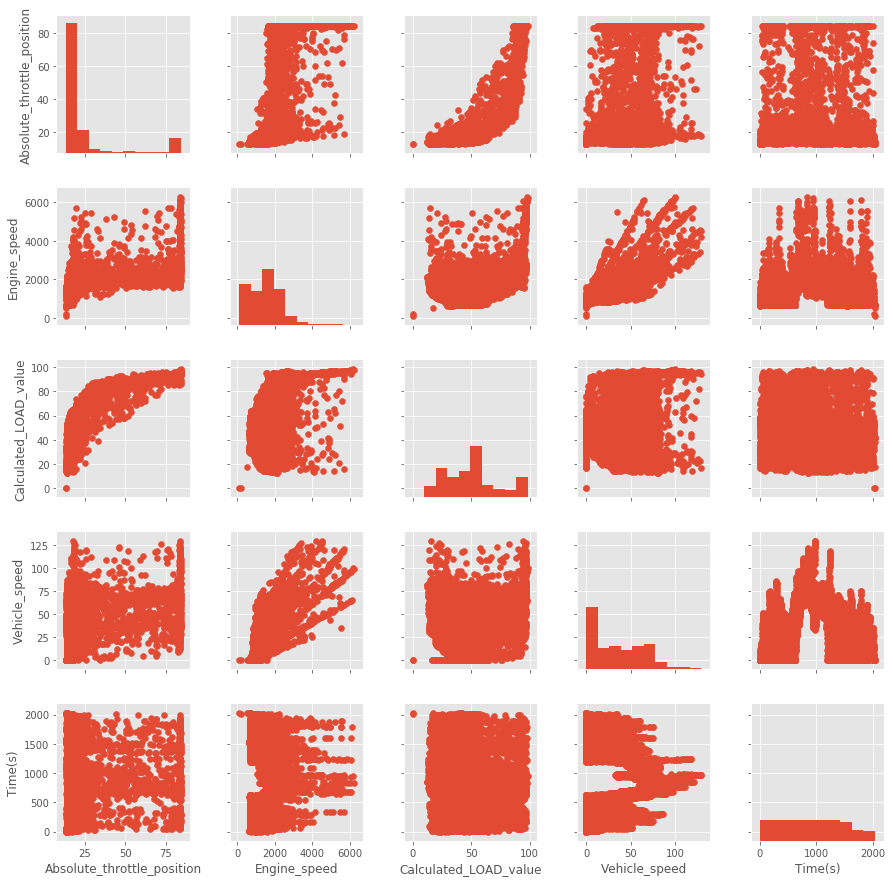

In [14]:
g = sns.PairGrid(driver_A)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

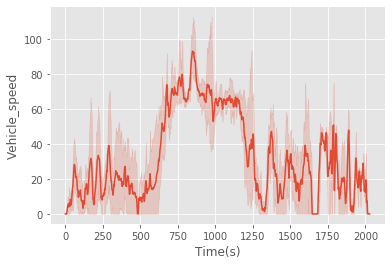

In [15]:
#Speed distribution across the trip
ax = sns.lineplot(x='Time(s)',y='Vehicle_speed',data=driver_A)

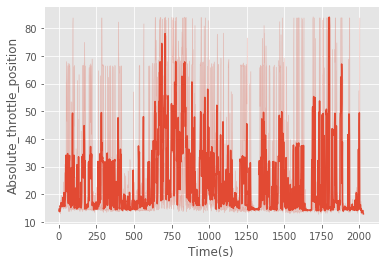

In [16]:
#Absolute Load distribution across trip
x = sns.lineplot(x='Time(s)',y='Absolute_throttle_position',data=driver_A)

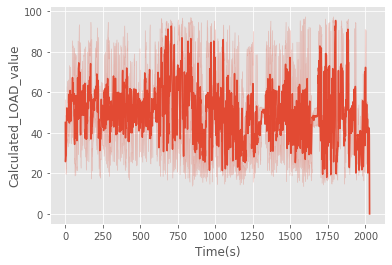

In [17]:
#Engine Load distribution across trip
ax = sns.lineplot(x='Time(s)',y='Calculated_LOAD_value',data=driver_A)

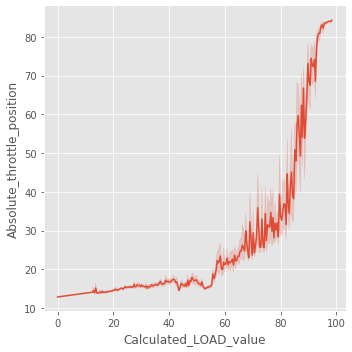

In [18]:
throttle_vs_load = sns.relplot(x='Calculated_LOAD_value',y='Absolute_throttle_position',kind='line',data=driver_A)

In [19]:
driver_A.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Absolute_throttle_position,Engine_speed,Calculated_LOAD_value,Vehicle_speed,Time(s)
Absolute_throttle_position,1.0,0.66,0.79,0.39,-0.0043
Engine_speed,0.66,1.0,0.36,0.77,0.054
Calculated_LOAD_value,0.79,0.36,1.0,0.061,-0.11
Vehicle_speed,0.39,0.77,0.061,1.0,0.07
Time(s),-0.0043,0.054,-0.11,0.07,1.0


In [20]:
driver_A.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Absolute_throttle_position,Engine_speed,Calculated_LOAD_value,Vehicle_speed,Time(s)
Absolute_throttle_position,1.0,0.78,0.64,0.56,-0.066
Engine_speed,0.78,1.0,0.2,0.85,0.061
Calculated_LOAD_value,0.64,0.2,1.0,-0.053,-0.16
Vehicle_speed,0.56,0.85,-0.053,1.0,0.092
Time(s),-0.066,0.061,-0.16,0.092,1.0


There is a strong correlation between throttle position and engine speed, throttle position and engine load, engine speed and vehicle speed

In [21]:
#driver_A.isnull().values.any()
throttle_change_rate = np.diff(driver_A['Absolute_throttle_position'].values) 
throttle_change_rate =np.append(throttle_change_rate,driver_A.tail(1).Absolute_throttle_position.values)
es_change_rate = np.diff(driver_A['Engine_speed'].values)
es_change_rate = np.append(es_change_rate,driver_A.tail(1).Engine_speed.values)
vs_change_rate =  np.diff(driver_A['Vehicle_speed'].values)
vs_change_rate =  np.append(vs_change_rate,driver_A.tail(1).Vehicle_speed.values)


In [22]:
mod_relative_A = pd.DataFrame({'Throttle_change_rate':throttle_change_rate,'ES_change_rate':es_change_rate,'VS_change_rate':vs_change_rate,
                               'Engine_load':driver_A.Calculated_LOAD_value.values})

In [23]:
mod_relative_A.describe()

,Throttle_change_rate,ES_change_rate,VS_change_rate,Engine_load
count,7240.000000,7240.000000,7240.000000,7240.000000
mean,0.001727,-0.069751,0.000000,50.350981
std,12.070355,240.442729,2.112135,22.124769
min,-67.800000,-1875.000000,-14.000000,0.000000
25%,-0.400000,-51.000000,-1.000000,32.500000
50%,0.000000,0.000000,0.000000,51.000000
75%,0.800000,38.000000,1.000000,59.600000
max,54.100000,2283.000000,11.000000,98.400000


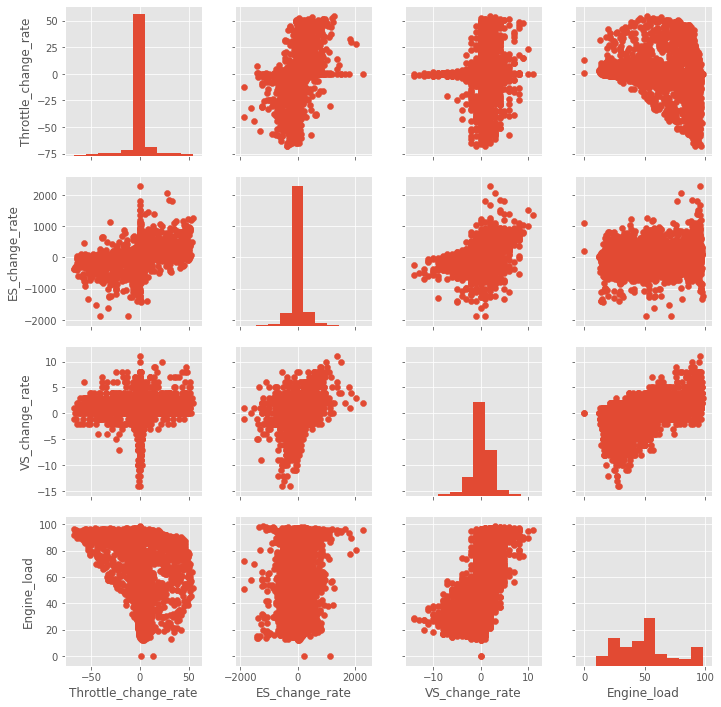

In [24]:
g = sns.PairGrid(mod_relative_A)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [25]:
mod_relative_A.isnull().any()

Throttle_change_rate    False
ES_change_rate          False
VS_change_rate          False
Engine_load             False
dtype: bool

In [26]:
mod_relative_A.head()

,Throttle_change_rate,ES_change_rate,VS_change_rate,Engine_load
0,0.4,-203,0,23.9
1,0.0,-41,0,30.6
2,-0.4,-10,0,31.8
3,0.4,41,0,29.0
4,0.0,24,0,30.2


Assumed vehicle max speed of 200 kph and engine speed of 6800 rpm

In [67]:
vehicle_speed_norm = [x/220 for x in driver_A['Vehicle_speed'].values]
engine_speed_norm = [x/8000 for x in driver_A['Engine_speed'].values]

In [68]:
rr_of_vs_and_es = [i/j for i,j in zip(vehicle_speed_norm, engine_speed_norm)]
len(rr_of_vs_and_es)

7240

In [69]:
maximum_change_tp = max(mod_relative_A['Throttle_change_rate'].values)
maximum_change_es = max(mod_relative_A['ES_change_rate'].values)
throttle_position_norm = [x/maximum_change_tp for x in mod_relative_A['Throttle_change_rate'].values]
#len(throttle_position_norm)
es_relative_norm = [x/maximum_change_es for x in mod_relative_A['ES_change_rate'].values]
#len(es_relative_norm)
rr_of_tp_and_es = pd.Series([i/j for i,j in zip(throttle_position_norm, es_relative_norm)])
len(rr_of_tp_and_es)
#np.isneginf(rr_of_tp_and_es).any()

e:\envirocar\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
e:\envirocar\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


7240

In [70]:
rr_of_tp_and_es.replace([np.inf,-np.inf], np.nan)
rr_of_tp_and_es.describe()

count    7035.000000
mean             NaN
std              NaN
min             -inf
25%         0.000000
50%         0.000000
75%         1.179269
max              inf
dtype: float64

In [71]:
np.isinf(rr_of_tp_and_es).any()

True

In [72]:
feature_set_driverA = pd.DataFrame({'rr_of_vs_and_es':rr_of_vs_and_es,'rr_of_tp_and_es':rr_of_tp_and_es,'engine_load':mod_relative_A['Engine_load'].values})

In [73]:
feature_set_driverA.describe()

,rr_of_vs_and_es,rr_of_tp_and_es,engine_load
count,7240.000000,7035.000000,7240.000000
mean,0.648471,NaN,50.350981
std,0.508587,NaN,22.124769
min,0.000000,-inf,0.000000
25%,0.082248,0.000000,32.500000
50%,0.649735,0.000000,51.000000
75%,1.058566,1.179269,59.600000
max,2.197614,inf,98.400000


In [74]:
feature_set_driverA = feature_set_driverA[~feature_set_driverA.isin([np.nan, np.inf, -np.inf]).any(1)]
feature_set_driverA.tail()

,rr_of_vs_and_es,rr_of_tp_and_es,engine_load
7235,0.0,0.000000,43.5
7236,0.0,0.000000,43.9
7237,0.0,-2.813309,43.9
7238,0.0,0.073391,43.9
7239,0.0,2.567808,0.0


In [75]:
labels = []
for index, row in feature_set_driverA.iterrows():
    if (0.9 <= row['rr_of_vs_and_es']<= 1.3) and (0.9 <= row['rr_of_tp_and_es']<=1.3) and (20 <= row['engine_load'] <= 50):
        labels.append(1)
    else:
        labels.append(-1)

In [76]:
pd.Series(labels).describe()

count    7004.000000
mean       -0.992290
std         0.123946
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         1.000000
dtype: float64

In [77]:
feature_set_driverA['label'] = labels

In [78]:
data = feature_set_driverA[['rr_of_vs_and_es','rr_of_tp_and_es','engine_load']]
target = feature_set_driverA['label']

In [39]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/76/79/60050330fe57fb59f2c53d0d11673df28c20ea9315da3652477429fc4949/scikit_learn-0.21.3-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/cd/c1/50a758e8247561e58cb87305b1e90b171b8c767b15b12a1734001f41d356/joblib-0.13.2-py2.py3-none-any.whl


You are using pip version 18.1, however version 19.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [81]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
decision_tree_model = adaboost_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = decision_tree_model.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9985727878211227


In [83]:
driver_B.tail()

,Absolute_throttle_position,Engine_speed,Calculated_LOAD_value,Vehicle_speed,Time(s),Class
84815,13.7,670,34.1,0,1972,B
84816,13.7,665,34.1,0,1973,B
84817,13.7,669,34.1,0,1974,B
84818,13.7,670,34.1,0,1975,B
84819,13.7,663,34.9,0,1976,B


In [84]:
driver_B.describe()
driver_B.isnull().values.any()

False

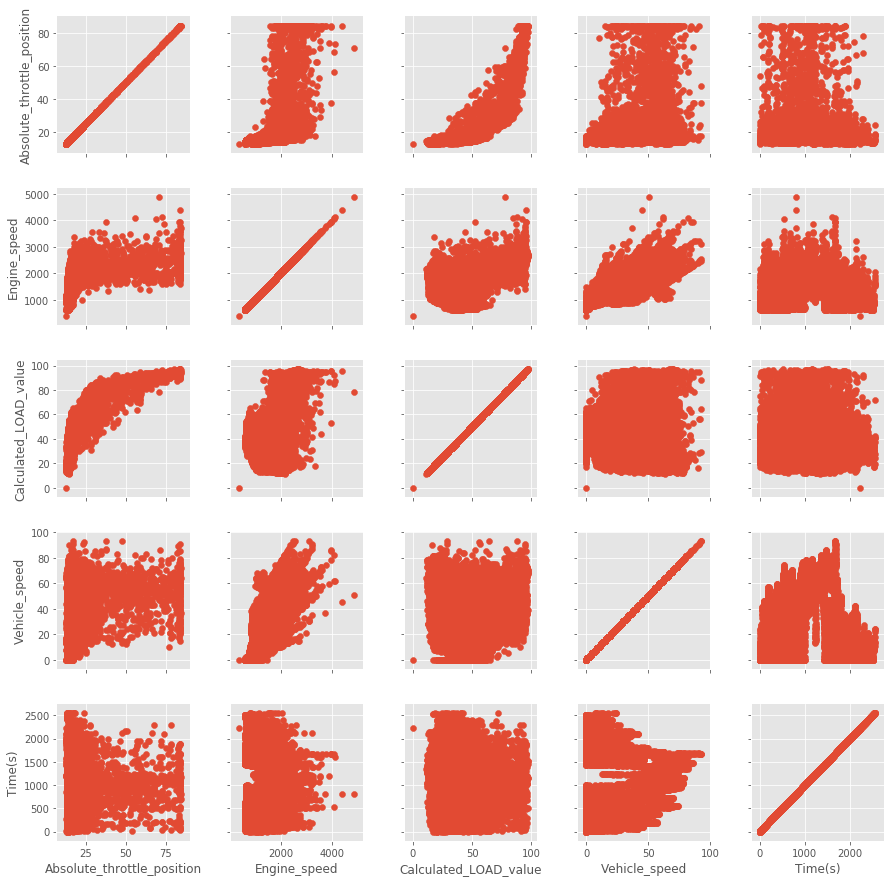

In [85]:
g = sns.PairGrid(driver_B)
g = g.map(plt.scatter)

In [86]:
driver_B.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Absolute_throttle_position,Engine_speed,Calculated_LOAD_value,Vehicle_speed,Time(s)
Absolute_throttle_position,1.0,0.52,0.71,0.32,-0.048
Engine_speed,0.52,1.0,0.16,0.84,0.019
Calculated_LOAD_value,0.71,0.16,1.0,-0.066,-0.14
Vehicle_speed,0.32,0.84,-0.066,1.0,0.079
Time(s),-0.048,0.019,-0.14,0.079,1.0


In [87]:
throttle_change_rate = np.diff(driver_B['Absolute_throttle_position'].values) 
print(len(throttle_change_rate))
es_change_rate = np.diff(driver_B['Engine_speed'].values)
vs_change_rate =  np.diff(driver_B['Vehicle_speed'].values)


12863


In [88]:
len(driver_B.Calculated_LOAD_value.values[:len(driver_B.Calculated_LOAD_value.values)-1])

12863

In [89]:
mod_relative_B = pd.DataFrame({'Throttle_change_rate':throttle_change_rate,'ES_change_rate':es_change_rate,'VS_change_rate':vs_change_rate,
                               'Engine_load':driver_B.Calculated_LOAD_value.values[:len(driver_B.Calculated_LOAD_value.values)-1]})

In [90]:
mod_relative_B.head()
mod_relative_B.isnull().any()

Throttle_change_rate    False
ES_change_rate          False
VS_change_rate          False
Engine_load             False
dtype: bool

In [91]:
vehicle_speed_norm = [x/220 for x in driver_B['Vehicle_speed'].values[:len(driver_B['Vehicle_speed'].values)-1]]
engine_speed_norm = [x/8000 for x in driver_B['Engine_speed'].values[:len(driver_B['Engine_speed'].values)-1]]
len(vehicle_speed_norm)

12863

In [107]:
vs_es = pd.DataFrame({'vs_norm':vehicle_speed_norm,'es_norm':engine_speed_norm})
vs_es['rr_of_vs_and_es'] = vs_es.vs_norm/vs_es.es_norm

In [108]:
maximum_change_tp = max(mod_relative_B['Throttle_change_rate'].values)
maximum_change_es = max(mod_relative_B['ES_change_rate'].values)
throttle_position_norm = [x/maximum_change_tp for x in mod_relative_B['Throttle_change_rate'].values]
#len(throttle_position_norm)
es_relative_norm = [x/maximum_change_es for x in mod_relative_B['ES_change_rate'].values]
#len(es_relative_norm)
tp_er = pd.DataFrame({'tp_norm':throttle_position_norm,'er_norm':es_relative_norm})
tp_er['rr_of_tp_and_es'] = tp_er.tp_norm/tp_er.er_norm
#np.isneginf(rr_of_tp_and_es).any()

In [94]:
rr_of_tp_and_es.describe()
rr_of_tp_and_es.replace([np.inf,-np.inf], np.nan)
#len(mod_relative_B['Engine_load'].values)
len(rr_of_tp_and_es)

12863

In [110]:
feature_set_driverB = pd.DataFrame({'rr_of_vs_and_es':vs_es.rr_of_vs_and_es.values,'rr_of_tp_and_es':tp_er.rr_of_tp_and_es.values,'engine_load':mod_relative_B['Engine_load'].values})

In [111]:
feature_set_driverB.describe()

,rr_of_vs_and_es,rr_of_tp_and_es,engine_load
count,12863.000000,12549.00000,12863.000000
mean,0.580291,NaN,41.428407
std,0.470004,NaN,17.569221
min,0.000000,-inf,0.000000
25%,0.000000,0.00000,27.500000
50%,0.562531,0.00000,40.400000
75%,1.030548,0.67716,50.600000
max,2.310960,inf,96.900000


In [112]:
feature_set_driverB = feature_set_driverB[~feature_set_driverB.isin([np.nan, np.inf, -np.inf]).any(1)]
feature_set_driverB.describe()

,rr_of_vs_and_es,rr_of_tp_and_es,engine_load
count,12471.000000,12471.000000,12471.000000
mean,0.594192,0.572509,41.345586
std,0.466398,16.242985,17.759878
min,0.000000,-421.426230,0.000000
25%,0.127592,0.000000,27.100000
50%,0.576221,-0.000000,40.000000
75%,1.033376,0.668533,50.600000
max,2.310960,815.442623,96.900000


In [113]:
labels = []
for index, row in feature_set_driverB.iterrows():
    if (0.9 <= row['rr_of_vs_and_es']<= 1.3) and (0.9 <= row['rr_of_tp_and_es']<=1.3) and (20 <= row['engine_load'] <= 50):
        labels.append(1)
    else:
        labels.append(-1)

In [114]:
data = feature_set_driverB[['rr_of_vs_and_es','rr_of_tp_and_es','engine_load']]
target = labels

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [116]:
decision_tree_model.fit(X_train, y_train)
predictions = decision_tree_model.predict(X_test)

In [117]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9994655264564404


In [118]:
import pickle

In [119]:
filename = 'behaviour_analysis.sav'
pickle.dump(decision_tree_model,open(filename,'wb'))

In [4]:
seat_leon_data = pd.read_csv(r'E:\Envirocar\analysis\data\2017-08-01_Seat_Leon_KA_KA_Frei.csv')

In [7]:
seat_leon_data.head(10)

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,08:42:52.043,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08:42:52.133,26,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08:42:52.223,26,98.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08:42:52.313,26,98.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,08:42:52.374,26,98.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN
5,08:42:52.463,26,98.0,0.0,0.0,16.0,0.88,NaN,NaN,NaN,NaN
6,08:42:52.524,26,98.0,0.0,0.0,16.0,0.88,89.0,NaN,NaN,NaN
7,08:42:52.613,26,98.0,0.0,0.0,16.0,0.88,89.0,21.0,NaN,NaN
8,08:42:52.674,26,98.0,0.0,0.0,16.0,0.88,89.0,21.0,14.1,NaN
9,08:42:52.763,26,98.0,0.0,0.0,16.0,0.88,89.0,21.0,14.1,14.5


In [6]:
seat_leon_data.describe()

,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
count,14510.000000,14509.000000,14508.000000,14507.000000,14506.000000,14505.000000,14504.000000,14503.000000,14502.000000,14501.000000
mean,72.206754,111.513061,1156.562586,31.207693,32.494416,14.197773,82.805902,22.775219,20.493532,20.810323
std,22.432260,19.893369,590.648753,26.903670,27.316191,10.632924,9.669170,1.180427,10.324593,10.397051
min,25.000000,36.000000,0.000000,0.000000,-6.000000,0.000000,13.700000,20.000000,14.100000,14.100000
25%,52.000000,102.000000,897.000000,3.000000,21.000000,8.360000,83.500000,22.000000,14.100000,14.500000
50%,82.000000,107.000000,1345.000000,29.000000,24.000000,13.630000,83.500000,23.000000,14.100000,14.500000
75%,91.000000,113.000000,1555.000000,51.000000,27.000000,18.360000,83.500000,24.000000,25.900000,25.900000
max,94.000000,232.000000,2534.000000,103.000000,141.000000,73.410000,89.000000,24.000000,60.800000,61.200000


In [10]:
seat_leon_data.isnull().any()

Time                                         False
Engine Coolant Temperature [Â°C]             False
Intake Manifold Absolute Pressure [kPa]       True
Engine RPM [RPM]                              True
Vehicle Speed Sensor [km/h]                   True
Intake Air Temperature [Â°C]                  True
Air Flow Rate from Mass Flow Sensor [g/s]     True
Absolute Throttle Position [%]                True
Ambient Air Temperature [Â°C]                 True
Accelerator Pedal Position D [%]              True
Accelerator Pedal Position E [%]              True
dtype: bool

In [13]:
seat_leon_data = seat_leon_data[~seat_leon_data.isin([np.nan]).any(1)]

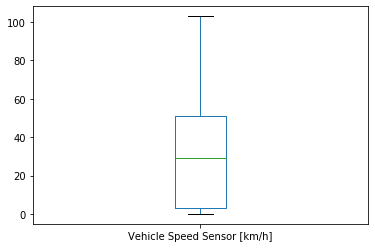

In [15]:
seat_leon_data['Vehicle Speed Sensor [km/h]'].plot(kind='box')
plt.show()

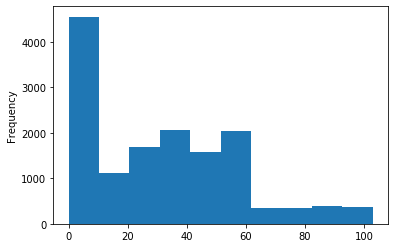

In [16]:
seat_leon_data['Vehicle Speed Sensor [km/h]'].plot(kind='hist')
plt.show()

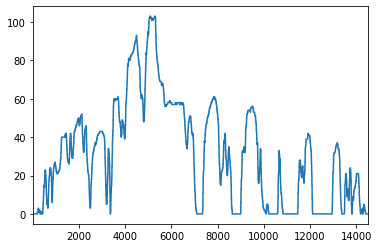

In [28]:
seat_leon_data['Vehicle Speed Sensor [km/h]'].plot()

In [17]:
seat_leon_data['Vehicle Speed Sensor [km/h]'].describe()

count    14501.000000
mean        31.220605
std         26.901744
min          0.000000
25%          3.000000
50%         29.000000
75%         51.000000
max        103.000000
Name: Vehicle Speed Sensor [km/h], dtype: float64

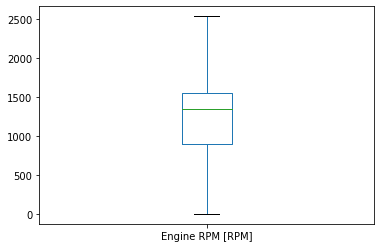

In [18]:
seat_leon_data['Engine RPM [RPM]'].plot(kind='box')

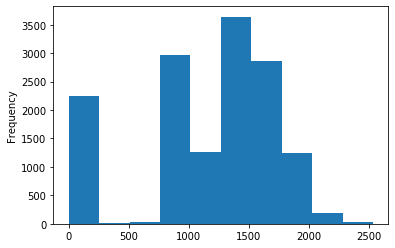

In [19]:
seat_leon_data['Engine RPM [RPM]'].plot(kind='hist')

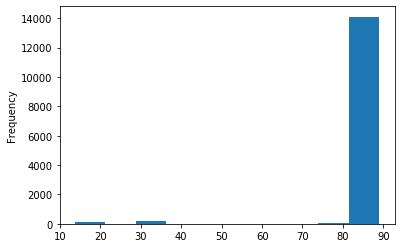

In [29]:
seat_leon_data['Absolute Throttle Position [%]'].plot(kind='hist')

In [20]:
throttle_change_rate = np.diff(seat_leon_data['Absolute Throttle Position [%]'].values) 
print(len(throttle_change_rate))

14500


In [21]:
es_change_rate = np.diff(seat_leon_data['Engine RPM [RPM]'].values) 
len(es_change_rate)

14500

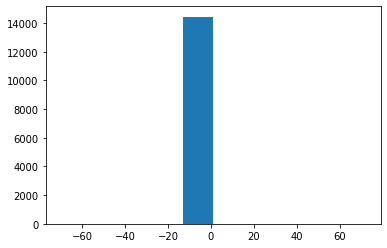

In [26]:
plt.hist(throttle_change_rate)
plt.show()

In [30]:
engine_load = [x/2.55 for x in seat_leon_data['Vehicle Speed Sensor [km/h]'].values]
vs_change_rate =  np.diff(seat_leon_data['Vehicle Speed Sensor [km/h]'].values)

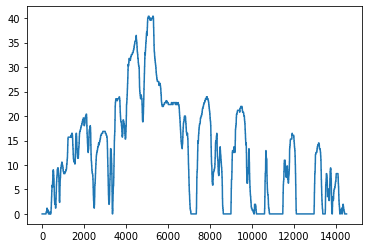

In [33]:
plt.plot(engine_load)

In [ ]:
vehicle_speed_norm = [x/220 for x in seat_leon_data['Vehicle Speed Sensor [km/h]'].values[:len(trip_data['Vehicle Speed Sensor'].values)-1]]
engine_speed_norm = [x/8000 for x in trip_data['Engine RPM'].values[:len(trip_data['Engine RPM'].values)-1]]
df = pd.DataFrame({'vs_norm':vehicle_speed_norm,'es_norm':engine_speed_norm})